# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [2]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
binutils set to manually installed.
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
libx11-dev set to manually installed.
tar is already the newest version (1.29b-2ubuntu0.1).
The following additional packages will be installed:
  libapr1 libaprutil1 libdpkg-perl libserf-1-1 libsvn1
Suggested packages:
  debian-keyring bz

### 2. Mount the drive to get the root binary and untar it 

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
FFT_imagen.ipynb	  root_build_google_yikes.tar
FFT.ipynb		  TrimmedTree.root
FLUTEMI.WAV		  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [6]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
drwx------  4 root root 4.0K Nov 11 16:04 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [2]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
from array import array

In [0]:
TD = ROOT.TTree( 'TD', 'tree para un par de dados' )
TD.Clear()

In [44]:
dado1 = array( 'i', [ 0] )
dado2 = array( 'i', [ 0 ] )

dado1

array('i', [0])

In [45]:
TD.Branch( 'D1', dado1, 'dado1/I' )
TD.Branch( 'D2', dado2, 'dado2/I' )

<ROOT.TBranch object ("D2") at 0x6e8f980>

In [46]:
TD.Scan()

0

************************************
*    Row   * D1.D1.dad * D2.D2.dad *
************************************
************************************


In [47]:
from random import randint
from random import seed
'''
for i in range(10):
  seed()
  print(randint(1,6))
  
  seed(1)
  print(randint(1,6))
  print("----------")
'''

'\nfor i in range(10):\n  seed()\n  print(randint(1,6))\n  \n  seed(1)\n  print(randint(1,6))\n  print("----------")\n'

In [0]:
for i in range(10000):
  seed()
  dado1[0] = randint(1,6)
  #print(dado1[0])
  
  seed(dado1[0])
  dado2[0] = randint(1,6)
  #print(dado2[0])
  #print('----')
  TD.Fill()




In [27]:
'''

f = ROOT.TFile.Open("blah.root")
for event in f.treename :
      print event.branchName.<do something with it>

for event in TD:

  print (event.D1)
  print(event.D2)
  print("---")

'''

'\n\nf = ROOT.TFile.Open("blah.root")\nfor event in f.treename :\n      print event.branchName.<do something with it>\n\nfor event in TD:\n\n  print (event.D1)\n  print(event.D2)\n  print("---")\n\n'

In [49]:
TD.Scan()

10000

************************************
*    Row   * D1.D1.dad * D2.D2.dad *
************************************
*        0 *         3 *         2 *
*        1 *         3 *         2 *
*        2 *         3 *         2 *
*        3 *         1 *         2 *
*        4 *         3 *         2 *
*        5 *         4 *         2 *
*        6 *         5 *         5 *
*        7 *         4 *         2 *
*        8 *         3 *         2 *
*        9 *         5 *         5 *
*       10 *         6 *         5 *
*       11 *         2 *         1 *
*       12 *         1 *         2 *
*       13 *         6 *         5 *
*       14 *         6 *         5 *
*       15 *         6 *         5 *
*       16 *         4 *         2 *
*       17 *         1 *         2 *
*       18 *         4 *         2 *
*       19 *         2 *         1 *
*       20 *         6 *         5 *
*       21 *         1 *         2 *
*       22 *         5 *         5 *
*       23 *         1 *         2 *
*

Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or q to quit ==> Type <CR> to continue or 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


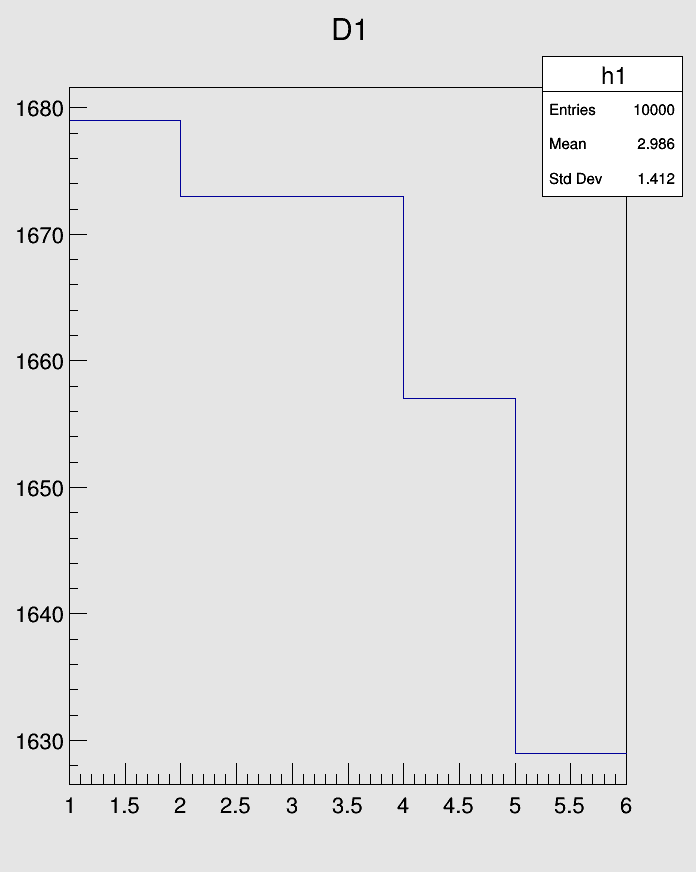

In [50]:
c1 = ROOT.TCanvas( 'c1', 'My First Data example', 200, 10, 700, 900 )
c1.SetFillColor( 18 )
TD.Draw("D1>>h1(5,1,6)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

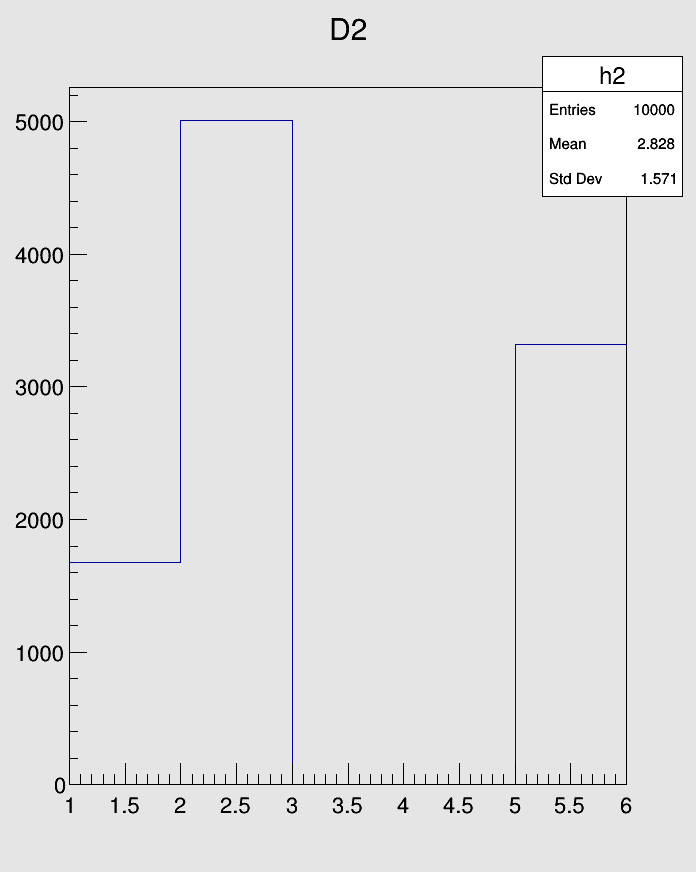

In [51]:
TD.Draw("D2>>h2(5,1,6)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

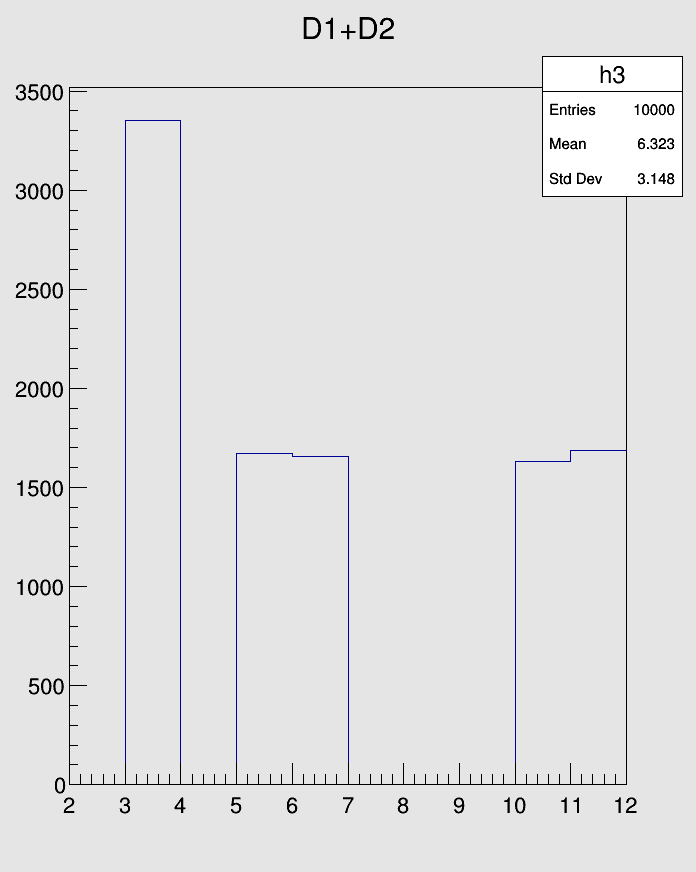

In [52]:
TD.Draw("D1+D2>>h3(10,2,12)")
c1.Update()
gROOT.GetListOfCanvases().Draw()

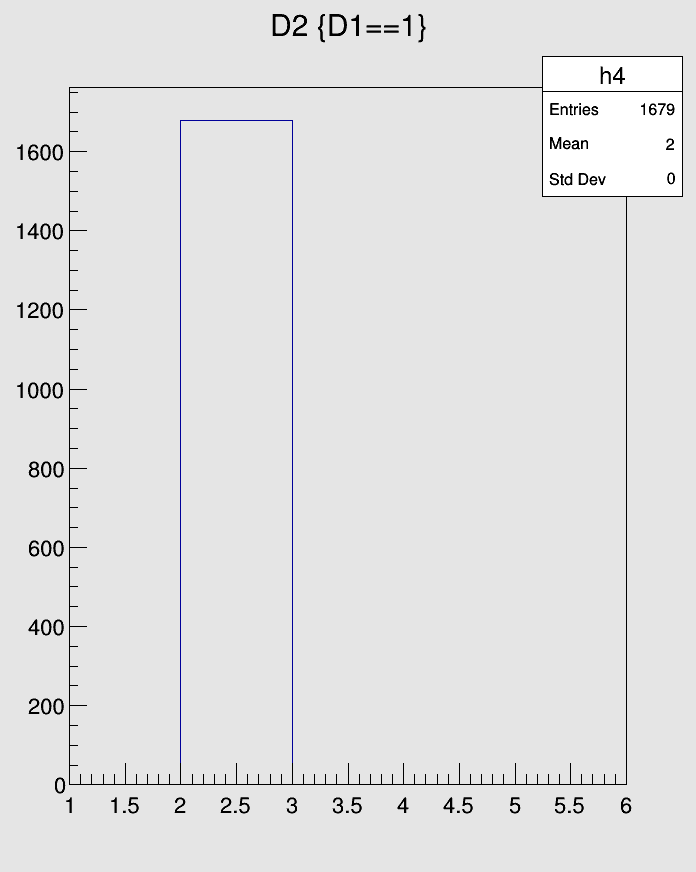

In [56]:


TD.Draw("D2>>h4(5,1,6)","D1==1")
c1.Update()
gROOT.GetListOfCanvases().Draw()



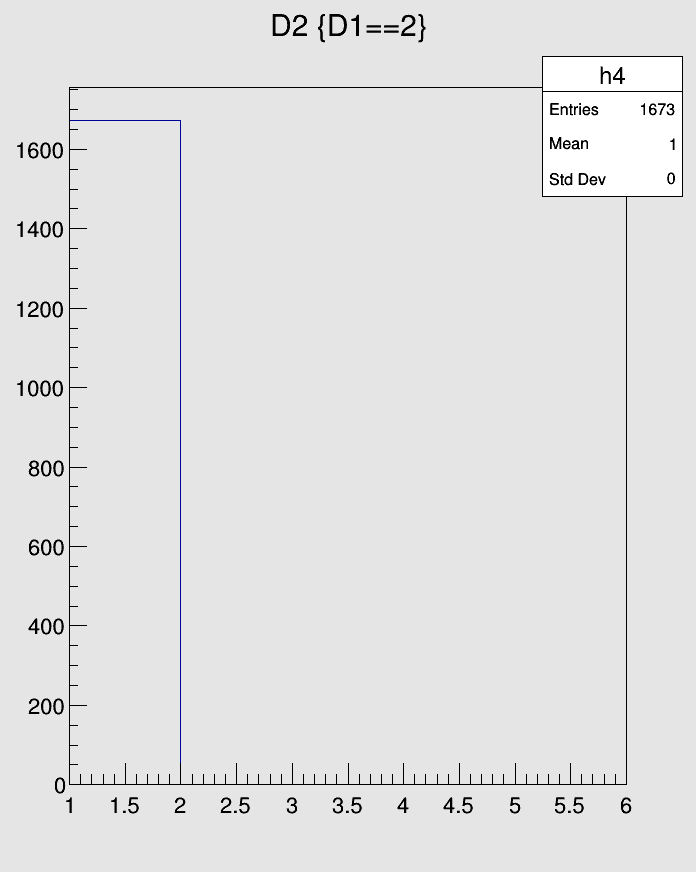

In [57]:
TD.Draw("D2>>h4(5,1,6)","D1==2")
c1.Update()
gROOT.GetListOfCanvases().Draw()



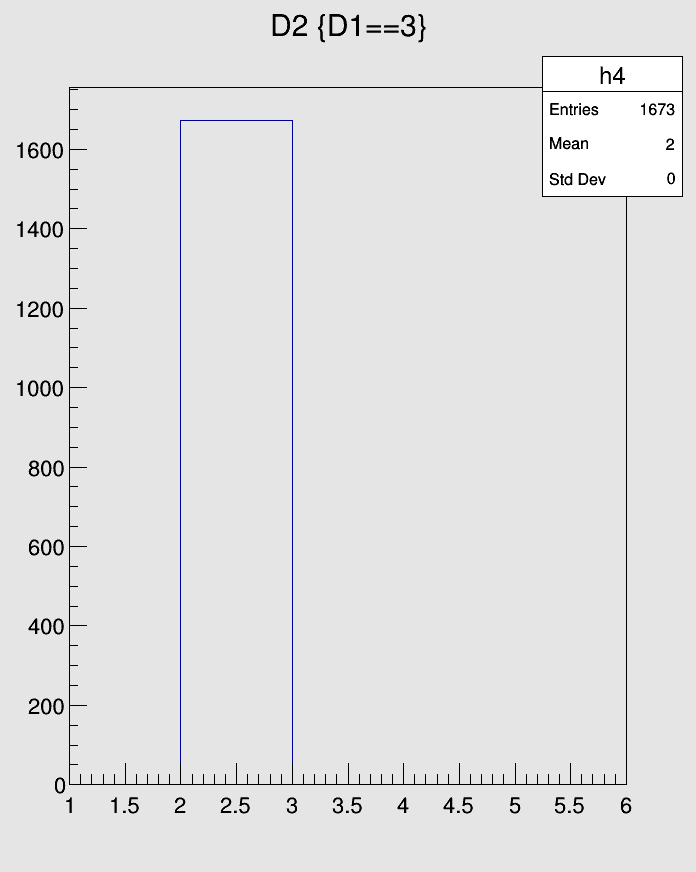

In [58]:


TD.Draw("D2>>h4(5,1,6)","D1==3")
c1.Update()
gROOT.GetListOfCanvases().Draw()

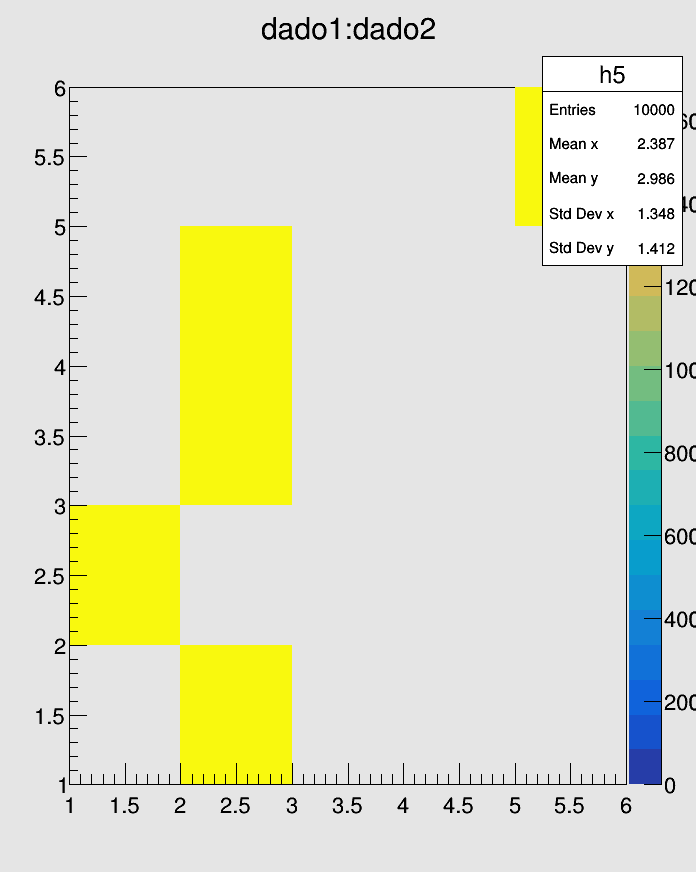

In [60]:
TD.Draw("dado1:dado2>>h5(5,1,6,5,1,6)","","colz")
c1.Update()
gROOT.GetListOfCanvases().Draw()